## Exploratory Data Analysis on FIFA World Cup 2022

### Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
data = pd.read_csv('stats.csv')
dat = pd.read_csv('team_data.csv')

### Checking Information about the data

In [2]:
data.head()

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,interceptions,tackles_interceptions,clearances,errors,passes_completed,passes
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,6,4.0,4.0,1.0,3,12.0,9.0,0.0,170.0,217.0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0,0.0,2.0,0.0,0,2.0,2.0,1.0,88.0,112.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,1,1.0,2.0,0.0,5,8.0,3.0,0.0,45.0,58.0
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,3,5.0,2.0,0.0,1,8.0,5.0,0.0,122.0,161.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0,0.0,0.0,0.0,0,0.0,2.0,0.0,8.0,15.0


In [3]:
dat.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [4]:
data.info()

#checking for null

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player                      680 non-null    object 
 1   position                    680 non-null    object 
 2   team                        680 non-null    object 
 3   age                         680 non-null    object 
 4   club                        679 non-null    object 
 5   birth_year                  680 non-null    int64  
 6   games                       680 non-null    int64  
 7   games_starts                680 non-null    int64  
 8   minutes                     680 non-null    int64  
 9   minutes_90s                 680 non-null    float64
 10  goals                       680 non-null    int64  
 11  assists                     680 non-null    int64  
 12  goals_pens                  680 non-null    int64  
 13  pens_made                   680 non

player                          0
position                        0
team                            0
age                             0
club                            1
birth_year                      0
games                           0
games_starts                    0
minutes                         0
minutes_90s                     0
goals                           0
assists                         0
goals_pens                      0
pens_made                       0
pens_att                        0
cards_yellow                    0
cards_red                       0
goals_per90                     0
assists_per90                   0
goals_assists_per90             0
goals_pens_per90                0
goals_assists_pens_per90        0
xg                              3
npxg                            3
xg_assist                       3
npxg_xg_assist                  3
xg_per90                        5
xg_assist_per90                 5
xg_xg_assist_per90              5
npxg_per90    

In [5]:
dat.info()

#checking for null

dat.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 189 entries, team to aerials_won_pct
dtypes: float64(59), int64(129), object(1)
memory usage: 47.4+ KB


team               0
players_used       0
avg_age            0
possession         0
games              0
                  ..
own_goals          0
ball_recoveries    0
aerials_won        0
aerials_lost       0
aerials_won_pct    0
Length: 189, dtype: int64

In [6]:
#changing null values with 0

data.fillna(0)

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,interceptions,tackles_interceptions,clearances,errors,passes_completed,passes
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,6,4.0,4.0,1.0,3,12.0,9.0,0.0,170.0,217.0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0,0.0,2.0,0.0,0,2.0,2.0,1.0,88.0,112.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,1,1.0,2.0,0.0,5,8.0,3.0,0.0,45.0,58.0
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,3,5.0,2.0,0.0,1,8.0,5.0,0.0,122.0,161.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0,0.0,0.0,0.0,0,0.0,2.0,0.0,8.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,1988,5,4,288,3.2,...,1,2.0,0.0,1.0,1,4.0,0.0,0.0,130.0,168.0
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,1998,3,3,264,2.9,...,5,3.0,3.0,1.0,6,13.0,4.0,0.0,94.0,129.0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,1998,4,4,347,3.9,...,6,4.0,1.0,2.0,3,10.0,5.0,0.0,251.0,277.0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,1989,3,3,270,3.0,...,2,4.0,0.0,0.0,6,10.0,15.0,0.0,68.0,98.0


#### Let's Look which player scored the most goals

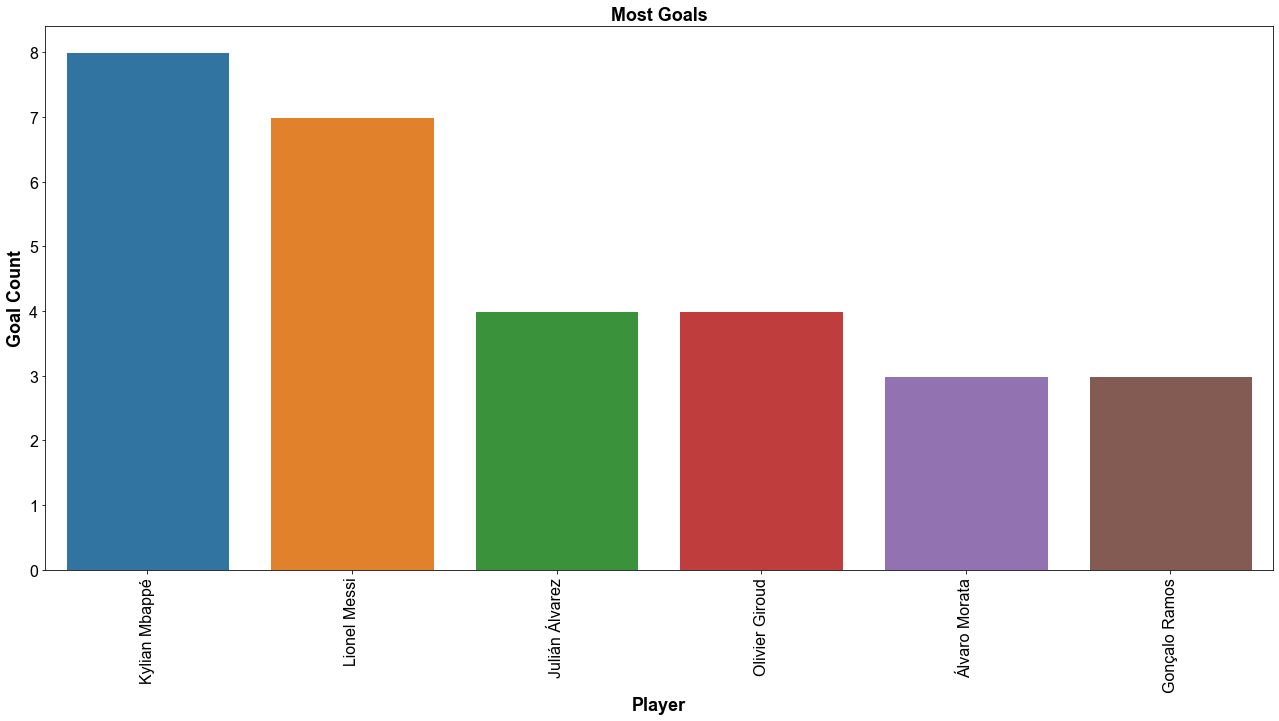

In [7]:
plt.figure(figsize=(22, 10))
plt.title('Most Goals', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('goals', ascending=False)[0:6]['player'],
            y=data.sort_values('goals', ascending=False)[0:6]['goals'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Goal Count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Kylian Mbappe Scored the most with 8, followed by Lionel Messi with 7

#### Let's Look which player made the most asissts

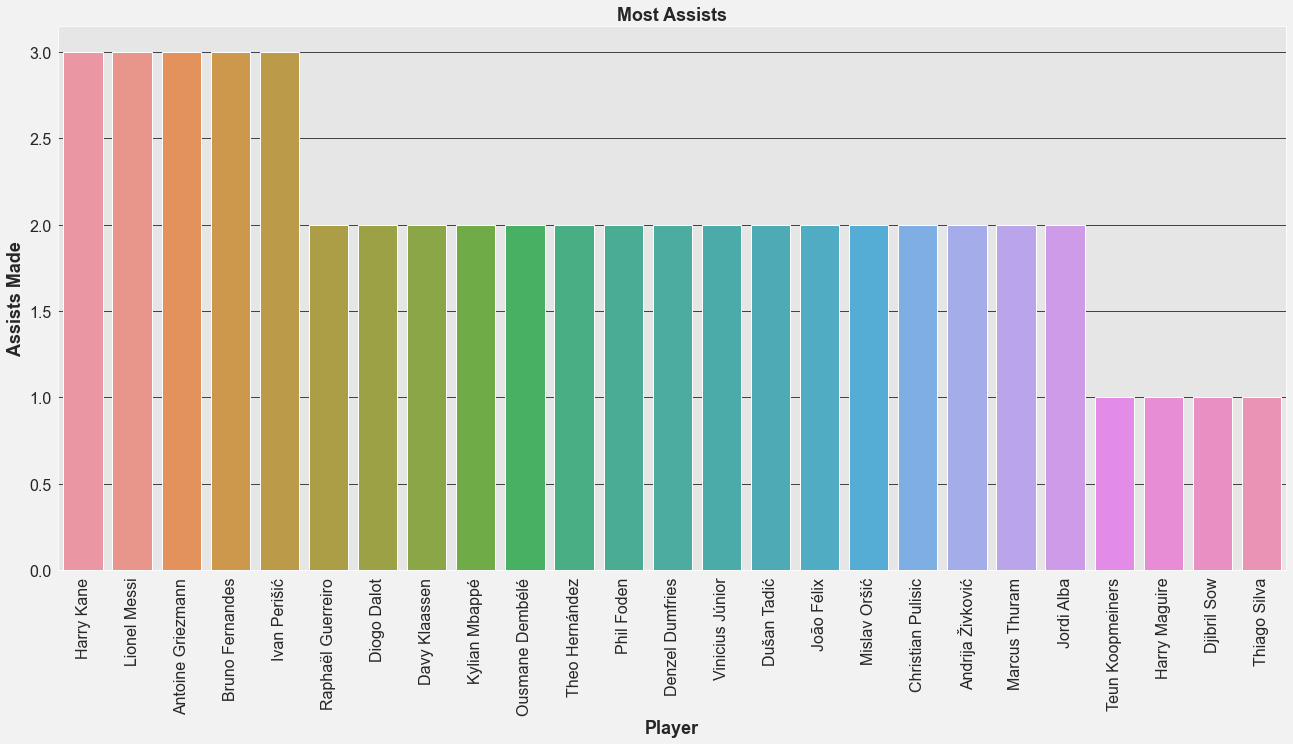

In [8]:
plt.figure(figsize=(22, 10))
plt.title('Most Assists', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('assists', ascending=False)[0:25]['player'],
            y=data.sort_values('assists', ascending=False)[0:25]['assists'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Assists Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Four Players are tied with the most assists namely Harry Kane, Lionel Messi, Antoine Griezmann and Bruno Fernandes

#### Let's see which player have made the most completed passes

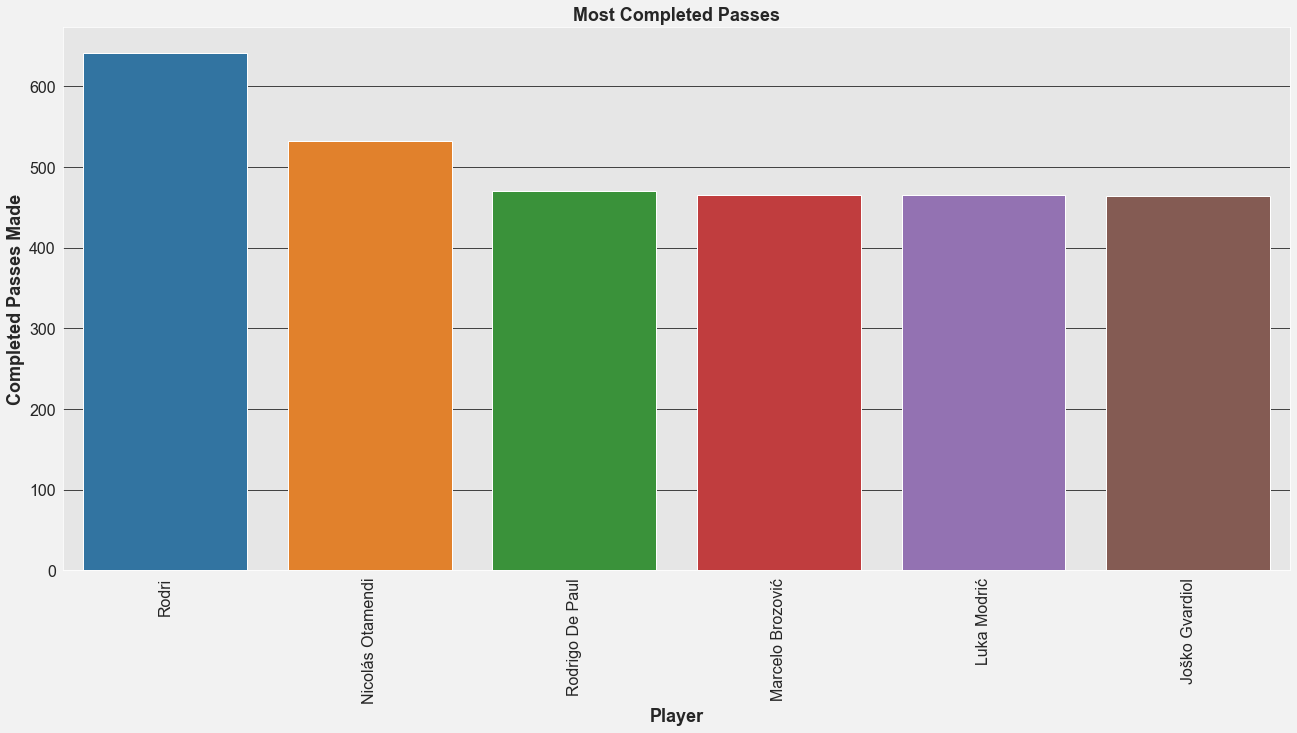

In [9]:
plt.figure(figsize=(22, 10))
plt.title('Most Completed Passes', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('passes_completed', ascending=False)[0:6]['player'],
            y=data.sort_values('passes_completed', ascending=False)[0:6]['passes_completed'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Completed Passes Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

The Player with the most completed pass is Rodri even though he only played four games in this tournament.

#### Let's see which goalkeeper have made the most saves

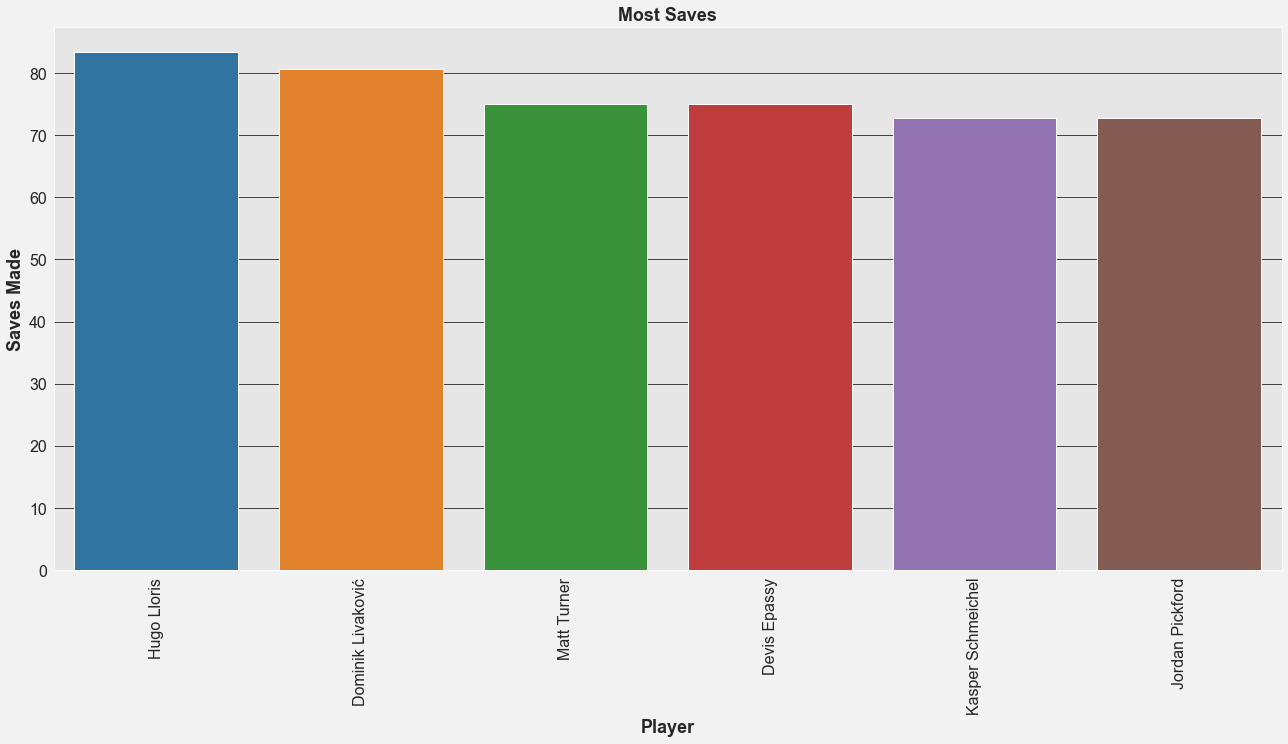

In [10]:
plt.figure(figsize=(22, 10))
plt.title('Most Saves', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('gk_saves', ascending=False)[0:6]['player'],
            y=data.sort_values('gk_saves', ascending=False)[0:6]['gk_saves'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Saves Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

The Keeper with the most saves is Hugo Lloris. Australian Keeper Matt Turner came third even though he only played 4 games in this tournament.

#### Most Tackles Won by a Player

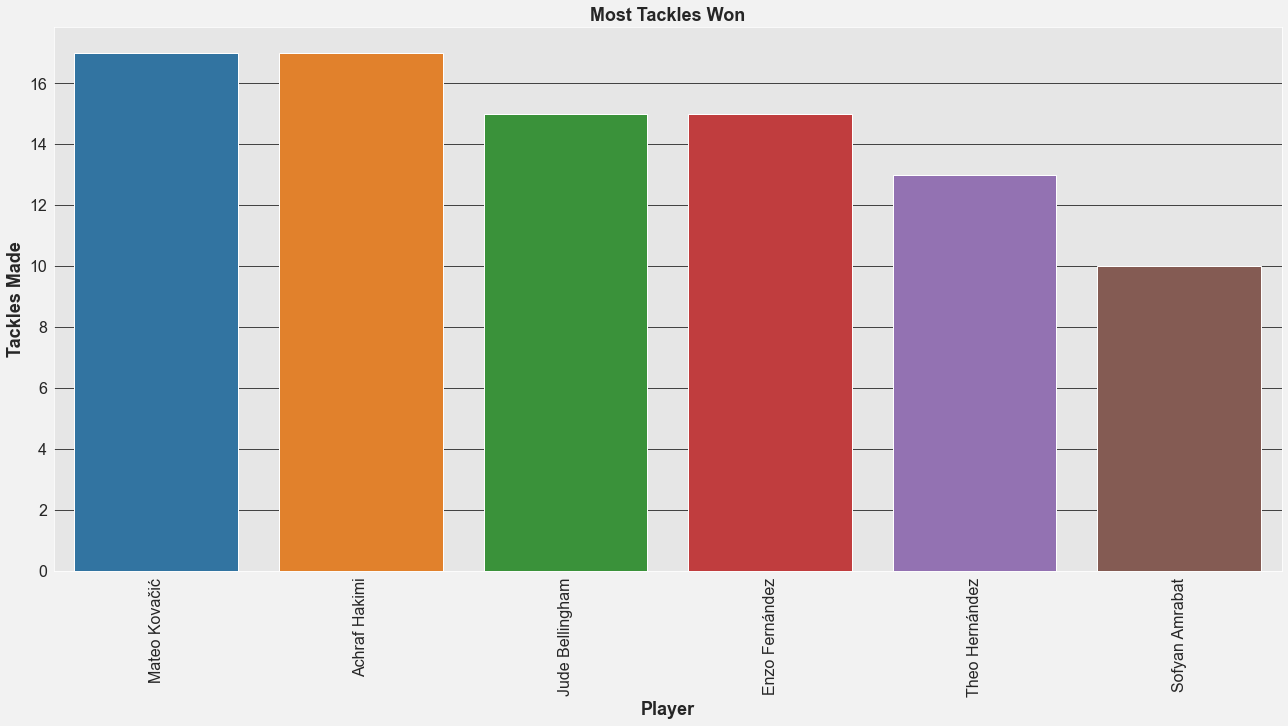

In [11]:
plt.figure(figsize=(22, 10))
plt.title('Most Tackles Won', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('tackles_won', ascending=False)[0:6]['player'],
            y=data.sort_values('tackles_won', ascending=False)[0:6]['tackles_won'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Tackles Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Mateo Kovačić and Achraf Hakimi are tied for the most tackles

#### Most Interceptions made by a Player

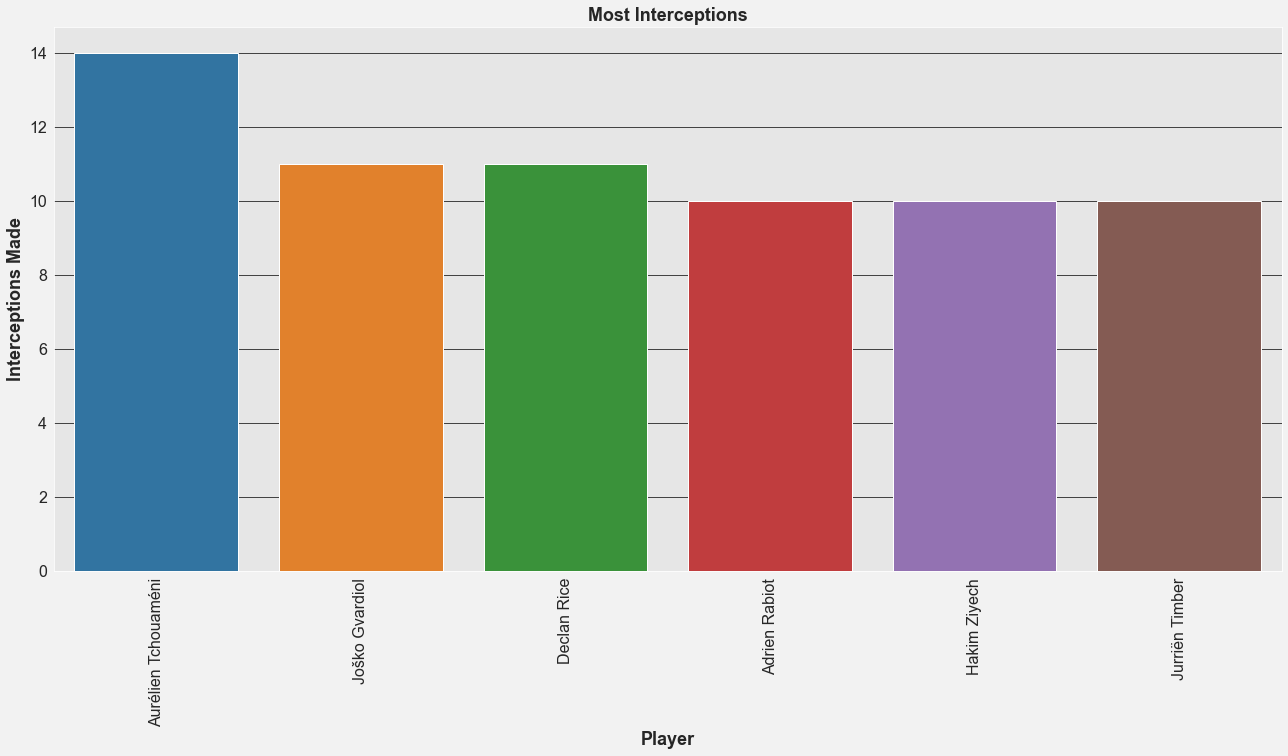

In [12]:
plt.figure(figsize=(22, 10))
plt.title('Most Interceptions', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('interceptions', ascending=False)[0:6]['player'],
            y=data.sort_values('interceptions', ascending=False)[0:6]['interceptions'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Interceptions Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Aurélien Tchouaméni made the most interceptions

#### Players with the most Clearances

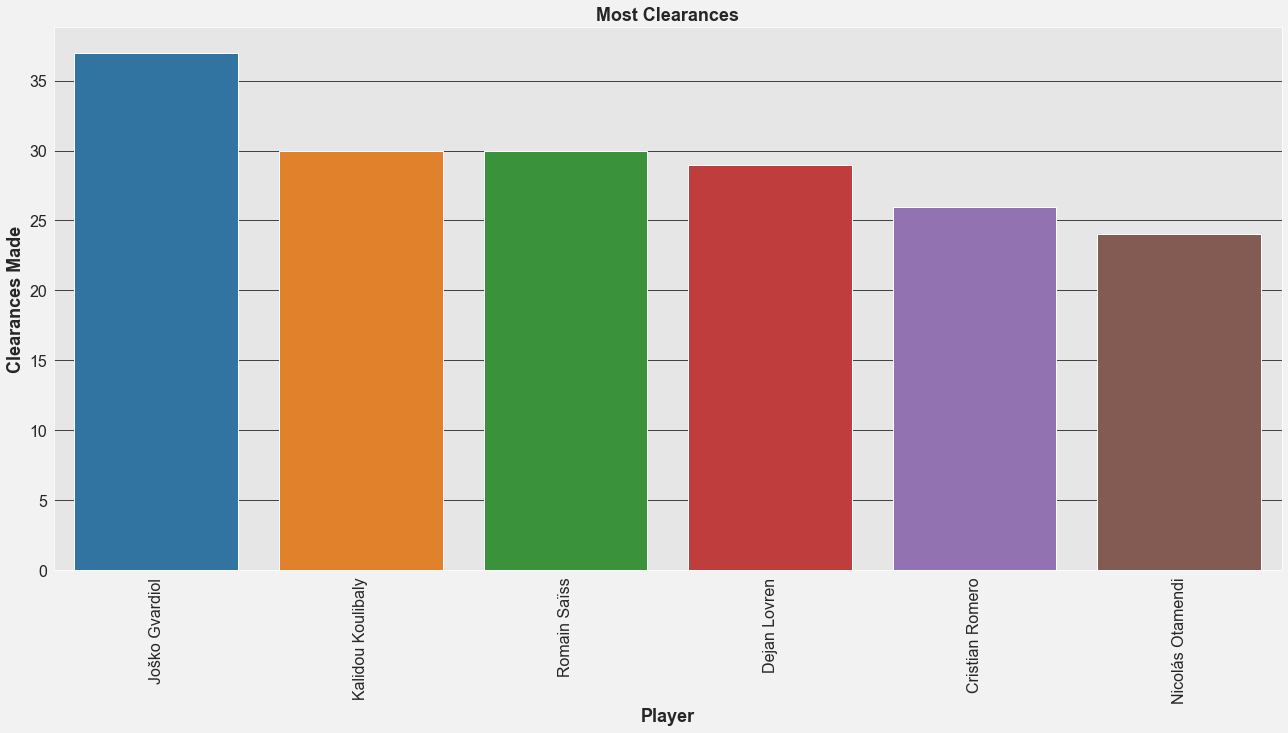

In [13]:
plt.figure(figsize=(22, 10))
plt.title('Most Clearances', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=data.sort_values('clearances', ascending=False)[0:6]['player'],
            y=data.sort_values('clearances', ascending=False)[0:6]['clearances'])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Clearances Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Gvardiol made the most Clearances

#### Teams with the Most Goals

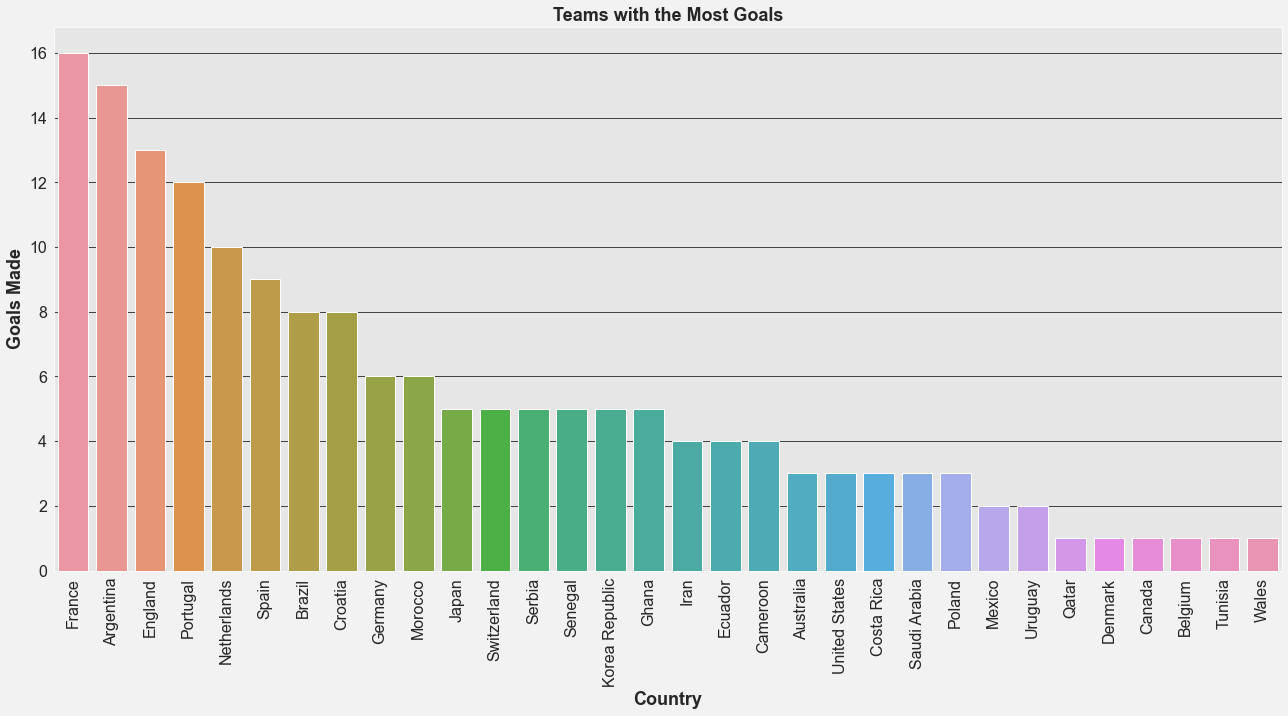

In [14]:
plt.figure(figsize=(22, 10))
plt.title('Teams with the Most Goals', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=dat.sort_values('goals', ascending=False)[0:32]['team'],
            y=dat.sort_values('goals', ascending=False)[0:32]['goals'])
plt.xlabel('Country', fontsize=18, fontweight='bold')
plt.ylabel('Goals Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Both of the Finalists have made the most goals in this tournament.

#### Which team made the most assists

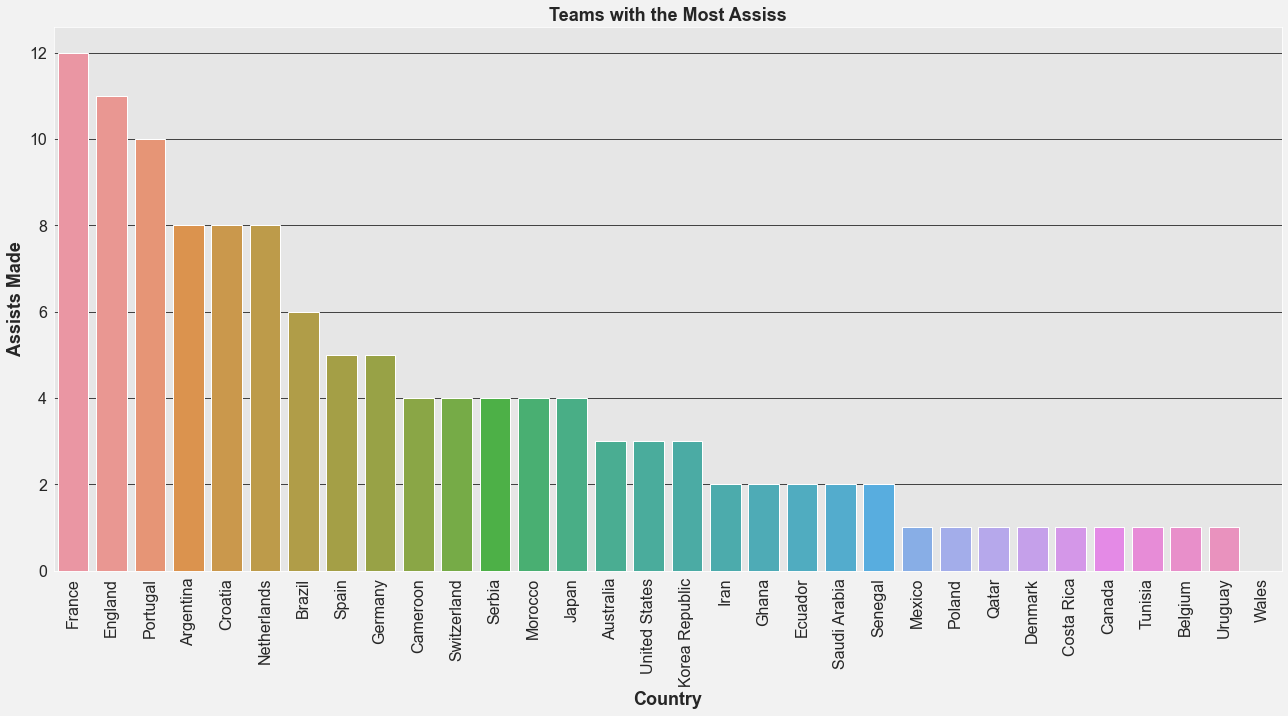

In [15]:
plt.figure(figsize=(22, 10))
plt.title('Teams with the Most Assiss', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=dat.sort_values('assists', ascending=False)[0:32]['team'],
            y=dat.sort_values('assists', ascending=False)[0:32]['assists'])
plt.xlabel('Country', fontsize=18, fontweight='bold')
plt.ylabel('Assists Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Of the 16 goals made by France in this tournament, 12 of those goals came from an assist.

#### Most Fouls by a Team

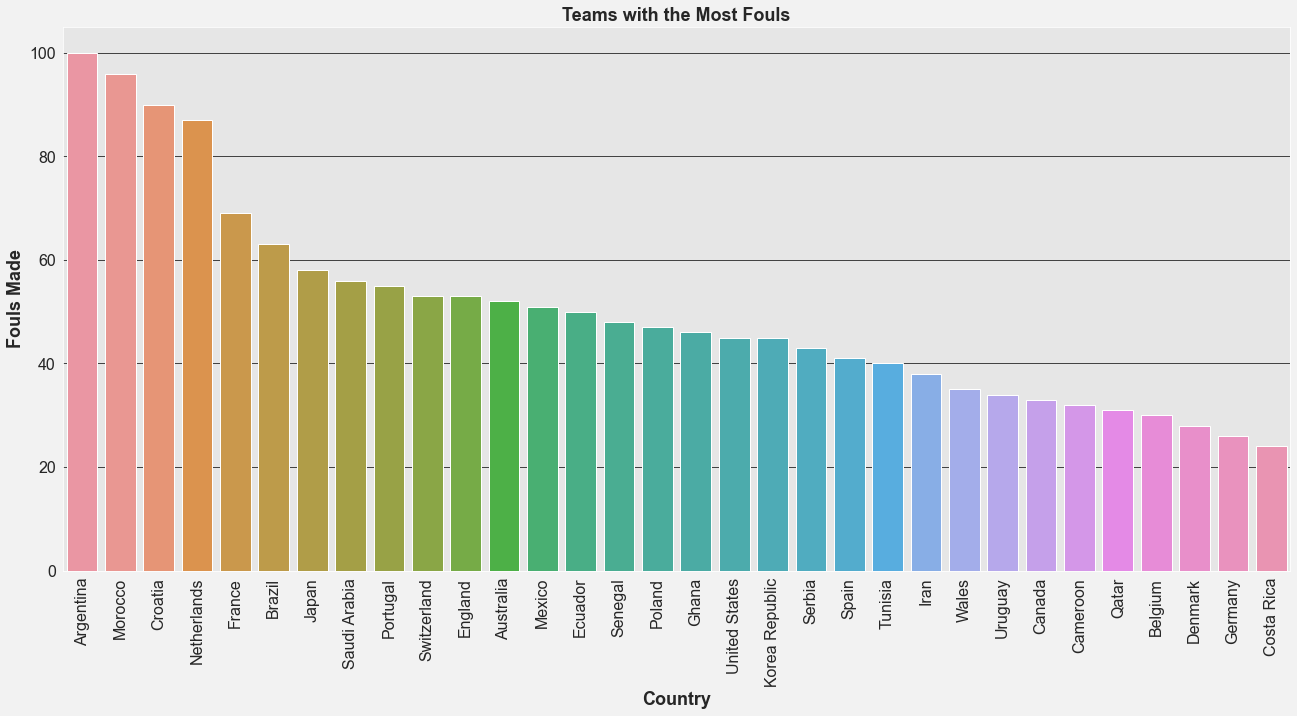

In [16]:
plt.figure(figsize=(22, 10))
plt.title('Teams with the Most Fouls', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=dat.sort_values('fouls', ascending=False)[0:32]['team'],
            y=dat.sort_values('fouls', ascending=False)[0:32]['fouls'])
plt.xlabel('Country', fontsize=18, fontweight='bold')
plt.ylabel('Fouls Made', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

The World Champions have made the most fouls in this tournament.

#### The Most Fouled Team

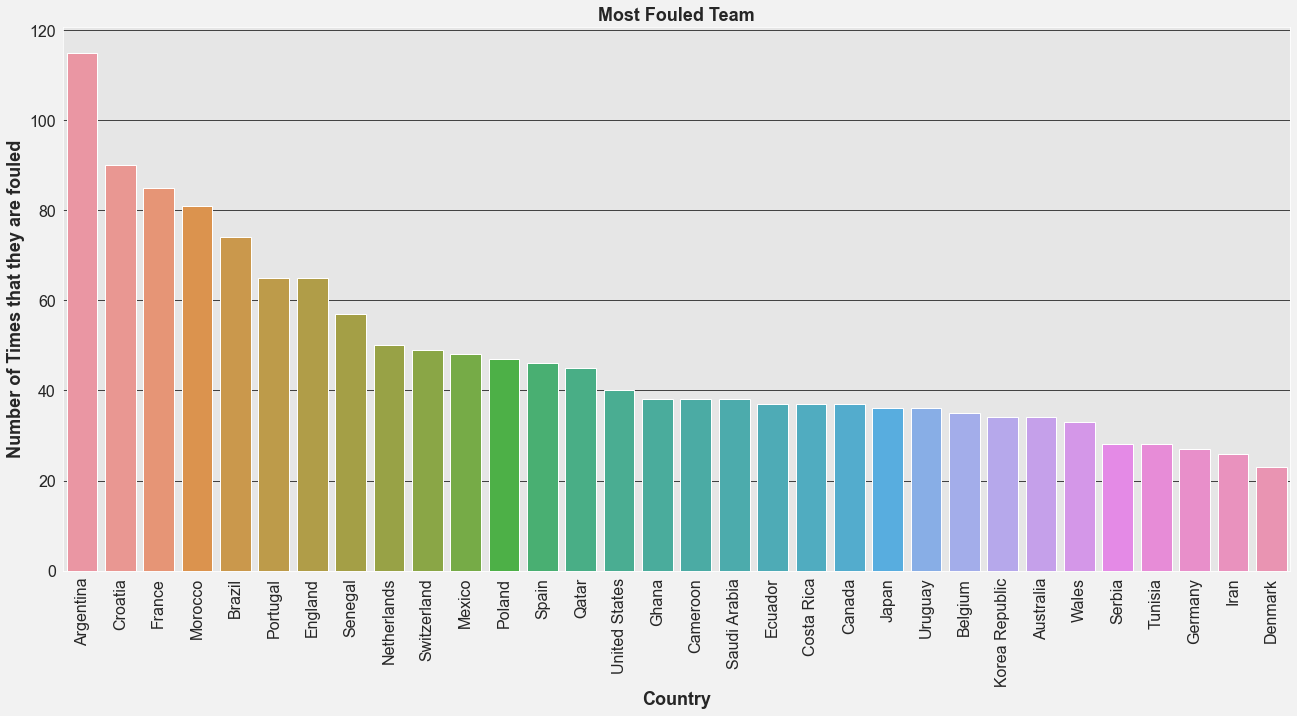

In [17]:
plt.figure(figsize=(22, 10))
plt.title('Most Fouled Team', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=dat.sort_values('fouled', ascending=False)[0:32]['team'],
            y=dat.sort_values('fouled', ascending=False)[0:32]['fouled'])
plt.xlabel('Country', fontsize=18, fontweight='bold')
plt.ylabel('Number of Times that they are fouled', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

Argentina is the most fouled team in this World Cup. 30 of those fouls came from the match against the Dutch during the Quarter-Finals.

#### Most Yellow Cards by a Team

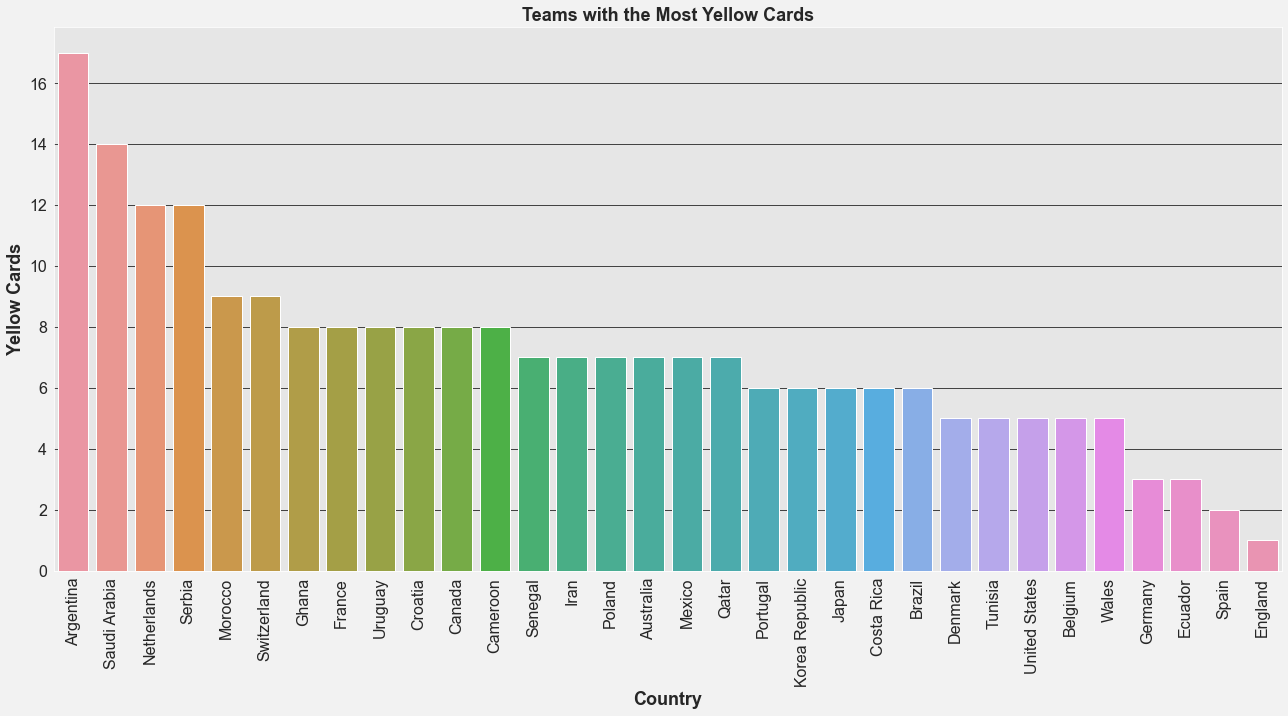

In [18]:
plt.figure(figsize=(22, 10))
plt.title('Teams with the Most Yellow Cards', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.9',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=dat.sort_values('cards_yellow', ascending=False)[0:32]['team'],
            y=dat.sort_values('cards_yellow', ascending=False)[0:32]['cards_yellow'])
plt.xlabel('Country', fontsize=18, fontweight='bold')
plt.ylabel('Yellow Cards', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

The Argentines have made the most yellow cards, 8 of those cards came from their meeting with the Dutch in the Quarter-Finals. Saudi Arabia came second and has the most yellow cards per game averaging 4.67